# 08 Top-k SRI domains

In [1]:
import re
from glob import iglob
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.shell import sqlContext

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/

Using Python version 3.7.3 (default, Mar 27 2019 09:23:15)
SparkSession available as 'spark'.


## Load the CSV files

In [2]:
data = sqlContext.read.parquet('../data/sri/2019-09/reports/08_topk_sri_domain/').toPandas()
data = data.set_index('domain')
data = data.sort_values(['percentage'], ascending=False)
data = data[0:10]

## Display the data

In [3]:
data['percentage'].sum()

89.76

## Plot the data

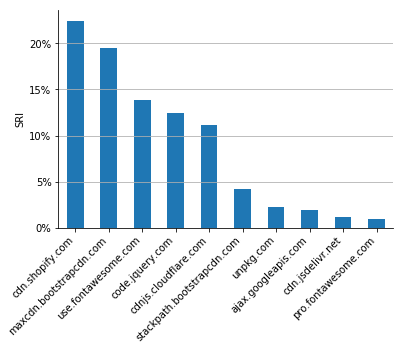

In [5]:
fig, ax = plt.subplots(1, 1)

data['percentage'].plot.bar(ax=ax, sharex=True, rot='xticks')
#data['percentage'].cumsum().plot.line(ax=ax, sharex=True)

plt.xticks(rotation=90)
plt.xlim(-0.5,9.5)
plt.xlabel('')
plt.ylabel('SRI')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid()

ax.set_yticklabels(['{:,.0%}'.format(x / 100) for x in ax.get_yticks()])

plt.xticks(rotation=45, ha="right")

plt.savefig('08_topk_sri_domain.pdf', bbox_inches='tight')